# raw data to csv

In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
number_samples = 25
sample_number = range(1, 1 + number_samples)
data = []
labelindex = {0: 'crazy',
              1: 'handwave',
              2: 'jazzhands',
              3: 'zorro'}

In [3]:
with open(f'./data/alldata.csv', 'w') as file_csv:
    file_csv.write('')
#     file_csv.close()

max_ = 0
for n in sample_number:
  with open(f'./data/data_{labelindex[0]}_{n}.txt') as file:
    data = ''
    
    files_lines = file.readlines()
    
    for line in files_lines:
        words = line.split()
        
        for word in words:
            data += f'{word},'
    
     
    if (len(data) > max_):
        with open(f'./data/alldata.csv', 'r+') as file_csv:
            max_ = len(data)
            s = file_csv.read()
            file_csv.seek(0)
            file_csv.write('0,' + data[:-1]+'\n'+ s)
            file_csv.close()
            
    else:
        with open(f'./data/alldata.csv', 'a') as file_csv:
            file_csv.write('0,' + data[:-1]+'\n')   
            file_csv.close()

In [4]:
df = pd.read_csv('./data/alldata.csv', header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,855,856,857,858,859,860,861,862,863,864
0,0,2.2,8.1,0.2,0.261799,2.345723,0.928515,2.8,7.7,1.2,...,8.4,-3.541273,-2.813471,-2.616249,8.5,6.1,8.4,-3.541273,-2.813471,-2.616249
1,0,3.4,8.5,-1.6,-2.022837,0.729548,-0.122173,4.4,7.9,-1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,2.4,7.8,-2.9,-2.019346,-0.219911,-0.127409,2.9,7.1,-1.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,2.8,6.0,2.6,-1.471313,1.617920,-0.120428,2.6,5.7,2.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,-0.3,8.5,-3.7,1.577778,4.900885,0.226893,-0.3,8.5,-3.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.fillna(0, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,855,856,857,858,859,860,861,862,863,864
0,0,2.2,8.1,0.2,0.261799,2.345723,0.928515,2.8,7.7,1.2,...,8.4,-3.541273,-2.813471,-2.616249,8.5,6.1,8.4,-3.541273,-2.813471,-2.616249
1,0,3.4,8.5,-1.6,-2.022837,0.729548,-0.122173,4.4,7.9,-1.3,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0,2.4,7.8,-2.9,-2.019346,-0.219911,-0.127409,2.9,7.1,-1.9,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0,2.8,6.0,2.6,-1.471313,1.617920,-0.120428,2.6,5.7,2.6,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,0,-0.3,8.5,-3.7,1.577778,4.900885,0.226893,-0.3,8.5,-3.7,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Columns: 865 entries, 0 to 864
dtypes: float64(864), int64(1)
memory usage: 169.1 KB


In [8]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,855,856,857,858,859,860,861,862,863,864
count,25.0,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,...,25.000,25.000000,25.000000,25.000000,25.00,25.000,25.000,25.000000,25.000000,25.000000
mean,0.0,2.112000,7.536000,-1.164000,-1.093623,2.182639,0.679701,2.484000,7.176000,-0.66400,...,0.336,-0.141651,-0.112539,-0.104650,0.34,0.244,0.336,-0.141651,-0.112539,-0.104650
std,0.0,1.471201,1.150681,2.791935,1.315349,1.651496,0.775213,1.691075,1.092123,2.90185,...,1.680,0.708255,0.562694,0.523250,1.70,1.220,1.680,0.708255,0.562694,0.523250
min,0.0,-2.100000,4.300000,-8.000000,-3.237586,-0.448550,-0.448550,-2.100000,4.600000,-7.10000,...,0.000,-3.541273,-2.813471,-2.616249,0.00,0.000,0.000,-3.541273,-2.813471,-2.616249
25%,0.0,1.200000,7.100000,-3.300000,-2.022837,1.139700,0.132645,1.900000,6.700000,-3.10000,...,0.000,0.000000,0.000000,0.000000,0.00,0.000,0.000,0.000000,0.000000,0.000000
50%,0.0,2.400000,7.600000,-1.000000,-1.457350,1.712168,0.642281,2.600000,7.100000,-0.90000,...,0.000,0.000000,0.000000,0.000000,0.00,0.000,0.000,0.000000,0.000000,0.000000
75%,0.0,3.000000,8.100000,0.900000,-0.071558,3.618068,1.061160,3.800000,7.800000,1.60000,...,0.000,0.000000,0.000000,0.000000,0.00,0.000,0.000,0.000000,0.000000,0.000000
max,0.0,4.200000,9.400000,3.500000,1.577778,4.974188,3.012438,4.700000,9.200000,4.50000,...,8.400,0.000000,0.000000,0.000000,8.50,6.100,8.400,0.000000,0.000000,0.000000


In [9]:
target = df[0]
features = df.drop(columns=0)

In [10]:
print(df[:9])

   0    1    2    3         4         5         6    7    8    9    ...  855  \
0    0  2.2  8.1  0.2  0.261799  2.345723  0.928515  2.8  7.7  1.2  ...  8.4   
1    0  3.4  8.5 -1.6 -2.022837  0.729548 -0.122173  4.4  7.9 -1.3  ...  0.0   
2    0  2.4  7.8 -2.9 -2.019346 -0.219911 -0.127409  2.9  7.1 -1.9  ...  0.0   
3    0  2.8  6.0  2.6 -1.471313  1.617920 -0.120428  2.6  5.7  2.6  ...  0.0   
4    0 -0.3  8.5 -3.7  1.577778  4.900885  0.226893 -0.3  8.5 -3.7  ...  0.0   
5    0  1.9  7.7 -3.3 -1.005310  1.555088  0.207694  2.4  6.9 -3.2  ...  0.0   
6    0  3.0  6.5 -5.4 -1.350885  3.813544  0.764454  4.0  5.3 -5.5  ...  0.0   
7    0 -2.1  9.3 -1.0 -0.071558  3.083997  0.249582 -2.1  9.2 -0.9  ...  0.0   
8    0  1.2  8.0 -3.9 -2.131047  1.139700  0.331613  2.1  7.3 -3.5  ...  0.0   

        856       857       858  859  860  861       862       863       864  
0 -3.541273 -2.813471 -2.616249  8.5  6.1  8.4 -3.541273 -2.813471 -2.616249  
1  0.000000  0.000000  0.000000  0.0  0.0

In [11]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=43, shuffle=True)

In [12]:
def build_model(optimizer='adam', dense_dims=10):
    model = Sequential()
    model.add(Dense(dense_dims, input_dim=864))
    model.add(Dense(10, activation=tf.nn.relu))
    model.add(Dense(2, activation='softmax'))
    # Compile neural network
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # Return compiled network
    return model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                8650      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 22        
Total params: 8,782
Trainable params: 8,782
Non-trainable params: 0
_________________________________________________________________


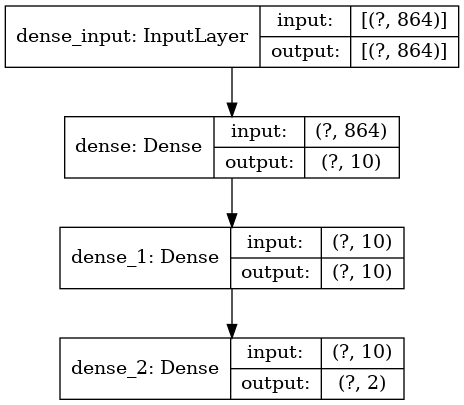

In [13]:
from sklearn.model_selection import cross_val_score
import pydot
from keras.utils import plot_model

model = build_model()

model.summary()

plot_model(model,  show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96)

In [14]:
## ENTRENAMIENTO DEL MODELO
history = model.fit(features_train, target_train, epochs=20, validation_split=0.2, shuffle=True, verbose=2)

Epoch 1/20
1/1 - 0s - loss: 3.2962 - accuracy: 0.6250 - val_loss: 6.7881e-05 - val_accuracy: 1.0000
Epoch 2/20
1/1 - 0s - loss: 0.6774 - accuracy: 0.8750 - val_loss: 3.8743e-07 - val_accuracy: 1.0000
Epoch 3/20
1/1 - 0s - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
1/1 - 0s - loss: 3.2782e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
1/1 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
1/1 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
1/1 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 8/20
1/1 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 9/20
1/1 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 10/20
1/1 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.000

In [15]:
## VALIDAR EL MODELO
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

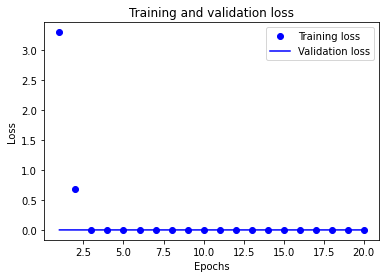

In [17]:
# Checking Overfit
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, "bo" ,  label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="upper right")

plt.show()